# Linear Regression 

   **Linear regression** is a statistical way of measuring the relationship between a response variable and one or more exploratory variables by fitting a line through observed data. 

## What Does Linear Regression Do? 

Linear Regression can be used for **prediction** or **inference**.

- Prediction: Predict a new target value.

- Inference: Attempt to understand the strength of a relationship between variables or detect important (significant) features using some statistical measures.

## Linear Regression at Play

Let's pretend that you're the CEO of an exciting new company, and like all CEO's, you're interested in seeing if you can improve the product sales. 

##### Company Data: 
* Amount spent on various marketing channels and subsequent sales.

You're interested in the figuring out the following: 

**Can we predict how well a product will sell, given spenditure in different marketing channels?**

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'

In [2]:
# Upload "marketing_data" into a dataframe
marketing_data = pd.read_csv('marketing_data.csv')
marketing_data.head(8)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2


## Is this an Appropriate Application for Linear Regression ?

   Recall: linear regression is a statistical way of measuring the relationship between a response variable and one or more exploratory variables by **fitting a line through observed data**. 
   
   Linear regression models use a straight line to predict product sales given the different marketing channel expenditure
   
 

## Can we use a Straight Line to Represent the Pattern of our Data?
* If we can, that means the relationship between our response variable and our exploratory variables is linear and linear regression is appropriate for our problem.

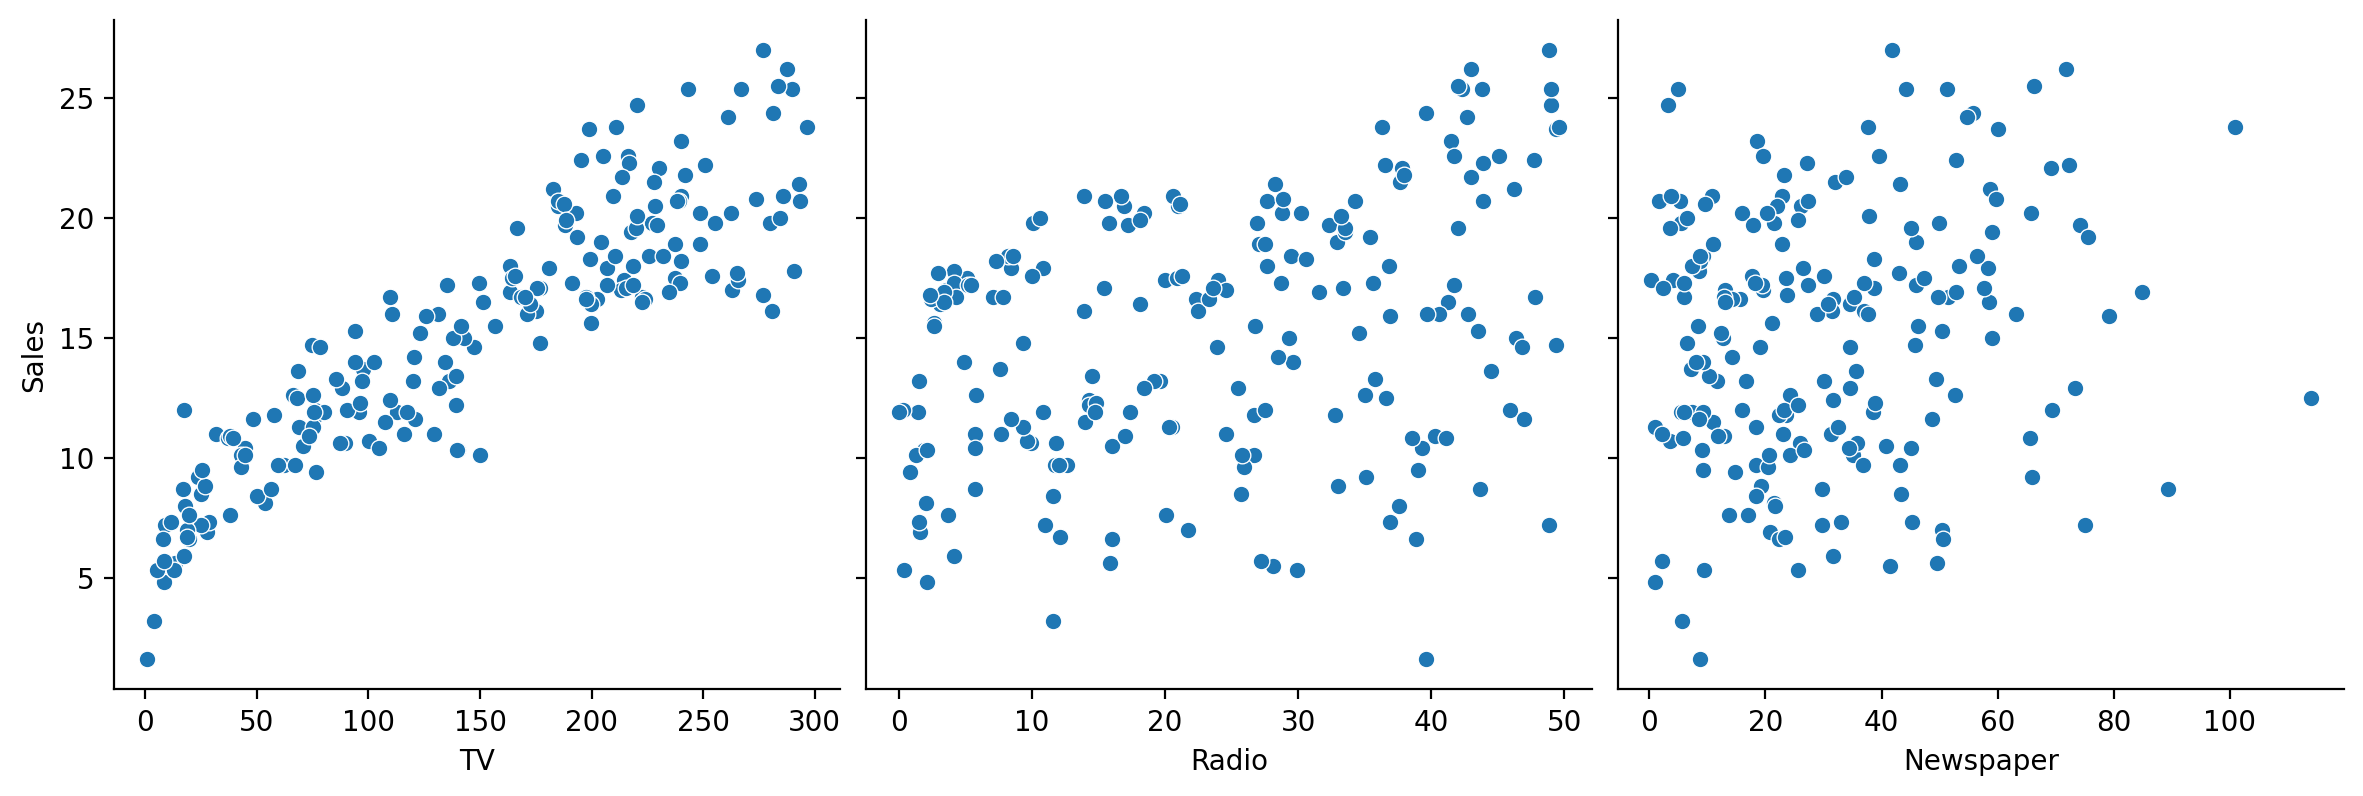

In [3]:
# Review pairwise correlations with Sales
sns.pairplot(marketing_data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

## How Does Linear Regression Find the Line of Best Fit? 

* Linear regression uses ordinary least squares estimate (OLSE) to find the the straight line that’s as close as possible to all the data points.

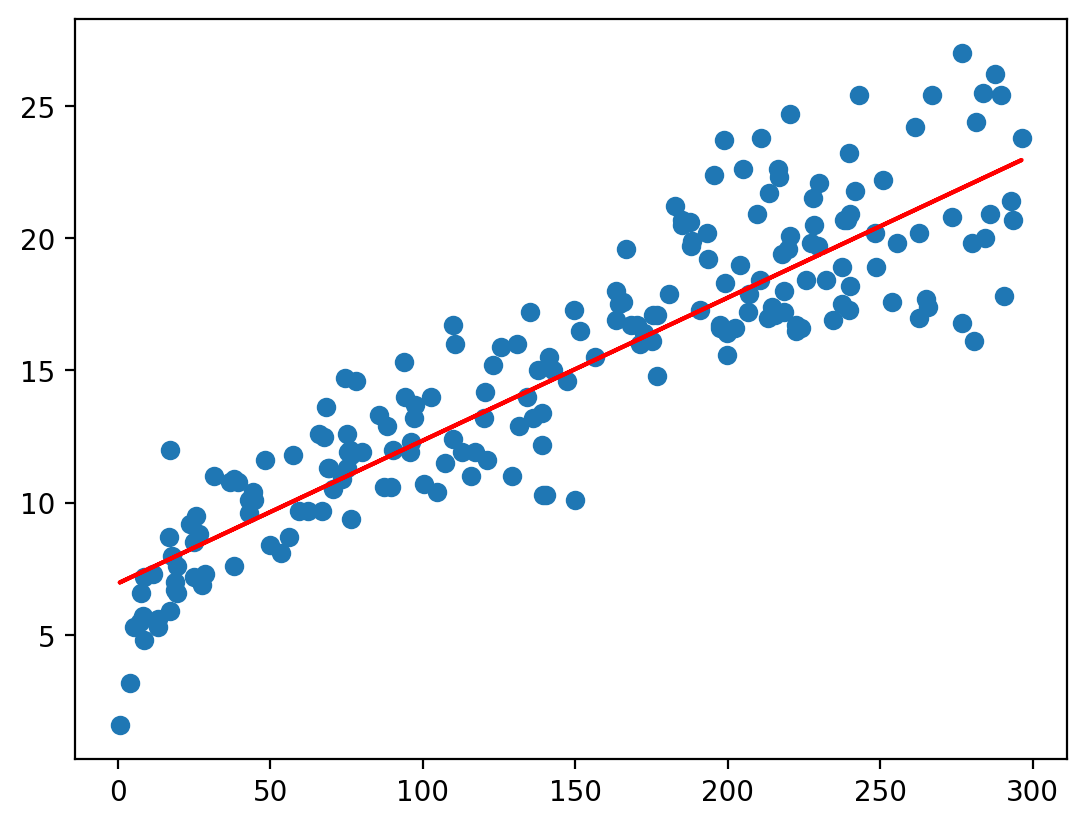

In [21]:
# Understand the best fit line
L1 = 15 + 0.0*marketing_data['TV']
L3 = 10 + 0.024*marketing_data['TV']
L2 = 19 - 0.024*marketing_data['TV']
L4 = 10 + 0.042*marketing_data['TV']
L5 = 6.948 + 0.054*marketing_data['TV']
plt.scatter(marketing_data['TV'], marketing_data['Sales'])
plt.plot(marketing_data['TV'], L5, 'r') # Change second parameter from L5 to L1, L2, L3 or L4 to observe various fitted lines
plt.show()

## How can we Statistically Confirm that this is the Best Line? 

In [9]:
# Fit the regression line
model = smf.ols('Sales ~ TV + Radio + Newspaper', marketing_data).fit() # formula: 'y~x' or 'y~x1+x2+x3..'
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           8.13e-99
Time:                        09:18:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R squared** measures goodness of fit. The range of R squared is 0 to 1.

**Global F Test:** Check if there is atleast one significant predictor in the model.

- $H_0$: $\beta_1=\beta_2=...=\beta_{p-1}=0$
    - i.e. Model with no independent variables fits the data as well as your model

    
- $H_1$: $\beta_j \neq 0$ for at least one j 
    - i.e. at least one of the independent variables makes the full model better than the model with no independent variables (the reduced model)

## Model Summary

In [10]:
# Evaluate summary using statistical measures t-test, R-squared
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           8.13e-99
Time:                        09:18:08   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Studentized t-test for Newspaper:** Check significance of each predictor
- $ H_0: Sales = \beta_0 + \beta_1(TV) + \beta_2(Radio) + \mathcal{E}$
    - i.e. the model without Newspaper as a predictor is better


- $ H_1: Sales = \beta_0 + \beta_1(TV) + \beta_2(Radio) + \beta_3(Newspaper) + \mathcal{E}$
    -  i.e. the model with Newspaper as a predictor is better

For newspaper, the t test statistic is 0.058 and the p value is 0.954. This **p-value is greater than our p-value threshold** (0.05) so we fail to reject the null hypothesis. Therefore we can conclude the model without Newspaper as a predictor is better.



## ANOVA (Yet another test)

* Type 1 - Given all the predictors considered above are already in the model, test for significance of the new predictor


* Type 2 - Given all other predictors are already in the model, test for significance of the predictor (same as t-test)

In [11]:
# ANOVA test to compare significance of predictor given other predictors are in the model
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
TV,1.0,4512.435170,4512.435170,1634.211538,4.960902e-97
Radio,1.0,502.338264,502.338264,181.925492,9.267678e-30
Newspaper,1.0,0.009286,0.009286,0.003363,9.538145e-01
Residual,196.0,541.201230,2.761231,NaN,NaN


## Refining the model
t-test and ANOVA both confirm that Newspaper is not significant to sales. We proceed to remove newspaper and fit the model again.

In [12]:
# Fit new model without newspaper
model_without_newspaper = smf.ols('Sales ~ TV + Radio', marketing_data).fit() # formula: 'y~x' or 'y~x1+x2+x3..'
model_without_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.39e-100
Time:                        09:18:14   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Review ANOVA for the new model
aov_table_without_newspaper = sm.stats.anova_lm(model_without_newspaper, typ=1)
aov_table_without_newspaper

,df,sum_sq,mean_sq,F,PR(>F)
TV,1.0,4512.435170,4512.435170,1642.521169,1.621783e-97
Radio,1.0,502.338264,502.338264,182.850546,6.662856e-30
Residual,197.0,541.210516,2.747262,NaN,NaN


## Linear Regression operates on assumptions

* Expected value of errors should be close to zero


* Variance of errors should be constant


* Errors are not correlated with each other


* Errors are normally distributed


## Residual plot

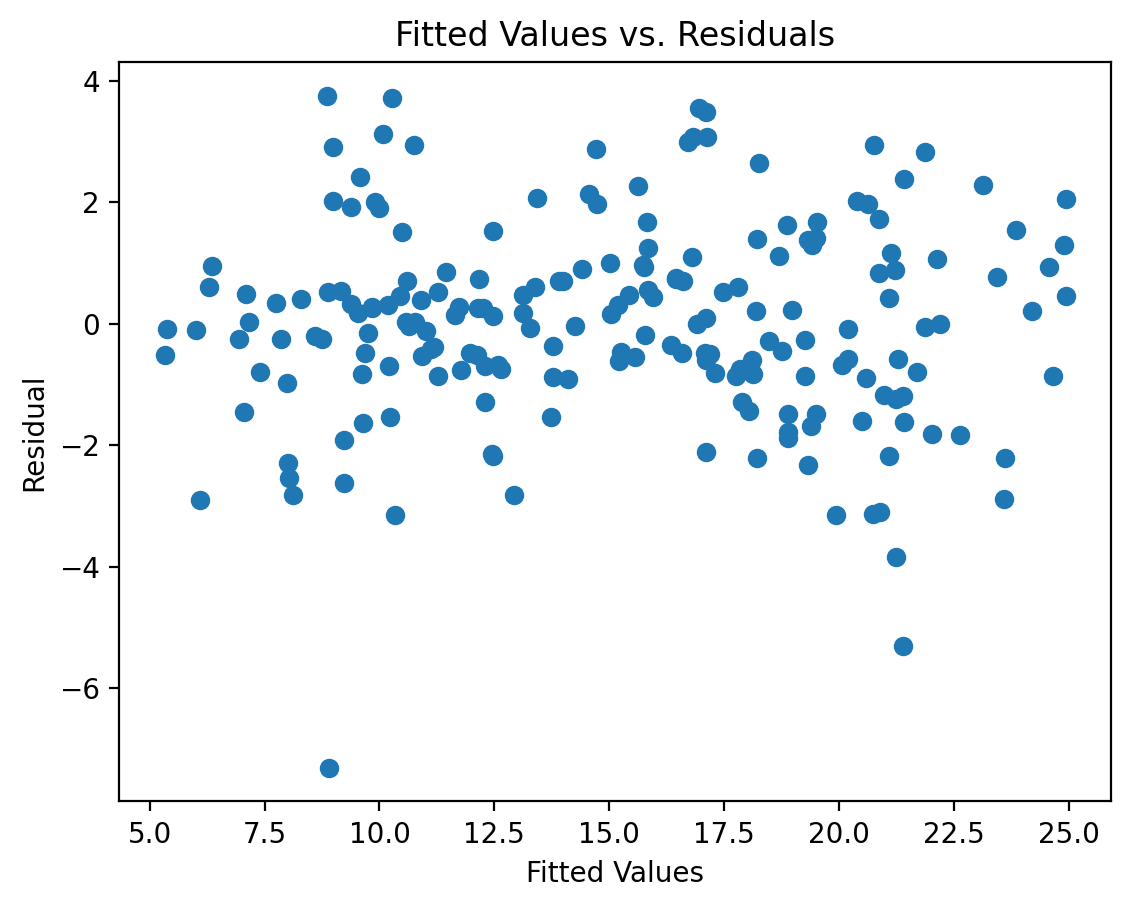

In [22]:
# Review assumptions based on residuals
fitted_values = model_without_newspaper.fittedvalues
residuals = model_without_newspaper.resid
plt.scatter(fitted_values,residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
plt.show()

## Normality Assumption Check

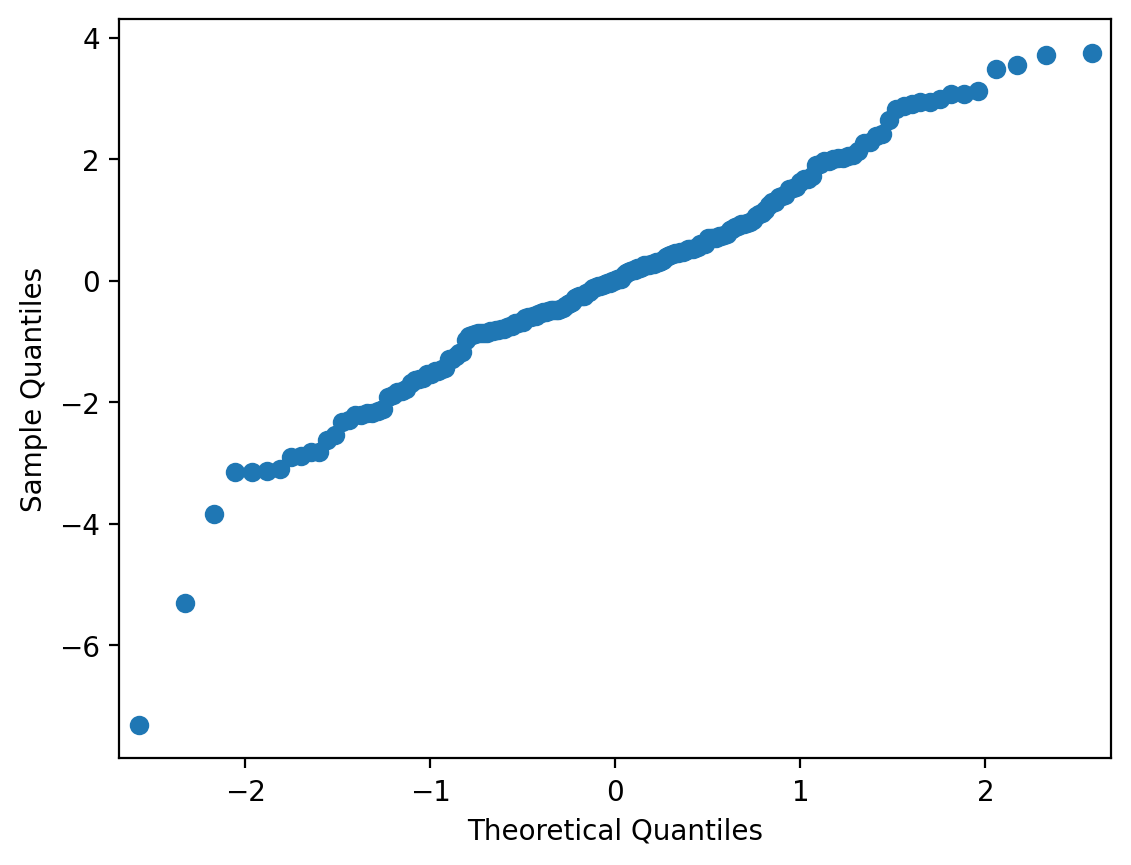

In [18]:
# Review normality assumption
sm.qqplot(model_without_newspaper.resid)

## Conclusion

Based on our diagnostics, this is the best line to model the data.

$$ Sales = 4.6 + 0.05*(TV) + 0.1*(Radio) $$

With this model, we can predict sales given the marketing spenditure by channel. Having this understanding means that we can better allocate our budget across the marketing channels.